# Clasificación con data de hundimiento del Titanic

## Extraccion (Ejercicio 1)

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd

In [2]:
def extract_titanic_data(url, refresh_cache=False):
    cache_fn = Path('titanic.csv')
    if not cache_fn.exists() or refresh_cache:
        print("Getting data")
        df = pd.read_csv(url)
        df.to_csv(cache_fn, index=False)
    else:
        print("Using cache")
        df = pd.read_csv(cache_fn)
    return df

In [3]:
url = 'http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.csv'
df_raw = extract_titanic_data(url)
df_raw

Getting data


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [4]:
# Split data into train and holdout
np.random.seed(1234)
msk = np.random.rand(len(df_raw)) >= 0.3
df_train = df_raw[msk]
df_test = df_raw[~msk]

In [5]:
df_train.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.55,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.55,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.00,0,0,112050,0.00,A36,S,NaN,NaN,"Belfast, NI"


In [6]:
len(df_train)

916

In [7]:
df_test.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
5,1,1,"Anderson, Mr. Harry",male,48.0,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
17,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C,6,NaN,"Montreal, PQ"
22,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,5,NaN,"New York, NY"


In [8]:
df_train.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

## Ejercicio 2: Primer preproceso / EDA

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 916 entries, 1 to 1305
Data columns (total 14 columns):
pclass       916 non-null int64
survived     916 non-null int64
name         916 non-null object
sex          916 non-null object
age          743 non-null float64
sibsp        916 non-null int64
parch        916 non-null int64
ticket       916 non-null object
fare         915 non-null float64
cabin        216 non-null object
embarked     914 non-null object
boat         362 non-null object
body         87 non-null float64
home.dest    523 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 107.3+ KB


In [10]:
# Tiene sentido dropear boat (y tambien body)
survived_with_boat = len(df_train[(~df_train['boat'].isnull()) & (df_train['survived'] == 1)])
survived = len(df_train[df_train['survived'] == 1])
(survived_with_boat / survived) * 100

96.22641509433963

In [11]:
!pip list

/bin/sh: 1: pip: not found


In [12]:
import logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s-%(name)s-%(levelname)s: %(message)s',
    handlers=[logging.FileHandler('titanic.log'), logging.StreamHandler()],
)
logger = logging.getLogger(__name__)

In [13]:
def _drop_unusable_cols(df, cols=[]):
    logger.info(
        f"Dropping the following {len(cols)} unusable columns:\n"
        f"{cols}"
    )
    #df.drop(cols, axis=1, inplace=True)
    df = df.drop(cols, axis=1)
    logger.info(
        f"Remaining {len(df.columns)} columns:\n {sorted(df.columns.tolist())}"
    )
    return df

In [14]:
df_train = _drop_unusable_cols(df_train, cols=['boat', 'body'])

2019-12-08 22:07:30,196-__main__-INFO: Dropping the following 2 unusable columns:
['boat', 'body']
2019-12-08 22:07:30,208-__main__-INFO: Remaining 12 columns:
 ['age', 'cabin', 'embarked', 'fare', 'home.dest', 'name', 'parch', 'pclass', 'sex', 'sibsp', 'survived', 'ticket']


In [15]:
df_train.columns, df_test.columns

(Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
        'fare', 'cabin', 'embarked', 'home.dest'],
       dtype='object'),
 Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
        'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
       dtype='object'))

In [16]:
df_test = _drop_unusable_cols(df_test, cols=['boat', 'body'])

2019-12-08 22:07:33,298-__main__-INFO: Dropping the following 2 unusable columns:
['boat', 'body']
2019-12-08 22:07:33,304-__main__-INFO: Remaining 12 columns:
 ['age', 'cabin', 'embarked', 'fare', 'home.dest', 'name', 'parch', 'pclass', 'sex', 'sibsp', 'survived', 'ticket']


In [17]:
# Join train test
df_train['train'] = True
df_test['train'] = False
df = pd.concat([df_train, df_test])

In [18]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest,train
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",True
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",True
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",True
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON",True
7,1,0,"Andrews, Mr. Thomas Jr",male,39.00,0,0,112050,0.0000,A36,S,"Belfast, NI",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,3,0,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C,NaN,False
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,NaN,False
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C,NaN,False
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C,NaN,False


In [19]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'home.dest', 'train'],
      dtype='object')

In [20]:
pd.value_counts(df['sex'])

male      843
female    466
Name: sex, dtype: int64

In [21]:
pd.value_counts?

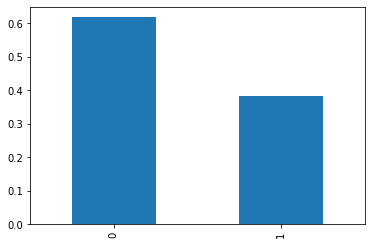

In [22]:
%matplotlib inline
pd.value_counts(df['survived'], normalize=True).plot.bar()

## EDA y Ejercicio 3

In [23]:
import seaborn as sns

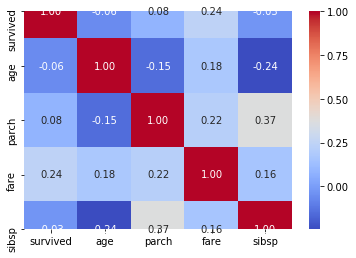

In [24]:
g = sns.heatmap(df[['survived', 'age', 'parch', 'fare', 'sibsp']].corr(),
                annot=True, fmt = ".2f", cmap = "coolwarm")

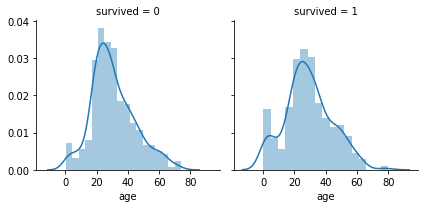

In [25]:
g = sns.FacetGrid(df, col='survived')
g = g.map(sns.distplot, 'age')

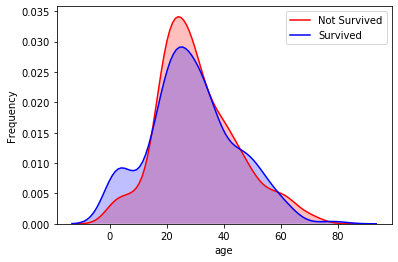

In [26]:
g = sns.kdeplot(df['age'][(df['survived'] == 0) & 
                             (df['age'].notnull())], color='Red', shade = True)
g = sns.kdeplot(df['age'][(df['survived'] == 1) & 
                             (df['age'].notnull())], color='Blue', shade = True)
g.set_xlabel('age')
g.set_ylabel('Frequency')
g = g.legend(['Not Survived', 'Survived'])

In [27]:
df[df['fare'].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest,train
1225,3,0,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,NaN,True


In [28]:
df['fare'].mean()

33.295479281345564

In [29]:
df[df['fare'].fillna(df['fare'].mean()).isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest,train


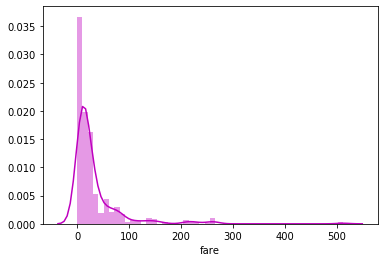

In [30]:
# Distribución de precio de boletos 
g = sns.distplot(df['fare'].fillna(df['fare'].mean()), color='m')

In [31]:
df[df['fare'] == 0]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest,train
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S,"Belfast, NI",True
70,1,0,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,112051,0.0,NaN,S,"Liverpool, England / Belfast",True
150,1,0,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,NaN,True
170,1,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,0.0,B52 B54 B56,S,Liverpool,True
223,1,0,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S,Belfast,True
234,1,0,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,NaN,S,"Rotterdam, Netherlands",True
473,2,0,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0,NaN,S,Belfast,True
528,2,0,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S,Belfast,True
581,2,0,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.0,NaN,S,Belfast,True
896,3,0,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,NaN,True


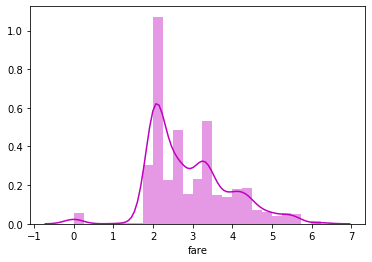

In [32]:
df['fare'] = df['fare'].map(lambda i: np.log(i) if i > 0 else 0)
g = sns.distplot(df['fare'].fillna(df['fare'].mean()), color='m')

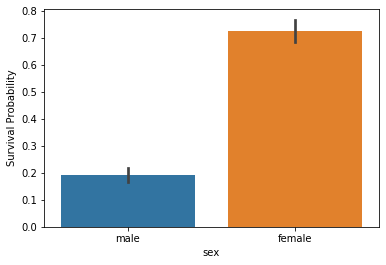

In [33]:
g = sns.barplot(x='sex', y='survived', data=df)
g = g.set_ylabel("Survival Probability")

In [34]:
df[['sex', 'survived']].groupby('sex').mean()

,survived
sex,
female,0.727468
male,0.190985


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


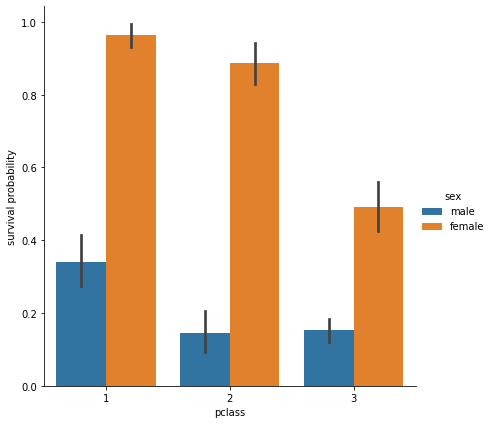

In [35]:
g = sns.factorplot(x='pclass', y='survived', hue='sex', data=df,
                   height=6, kind='bar')
g = g.set_ylabels("survival probability")

## Ejercicio 4: Valores nulos y constantes

In [36]:
df.isnull().mean()

pclass       0.000000
survived     0.000000
name         0.000000
sex          0.000000
age          0.200917
sibsp        0.000000
parch        0.000000
ticket       0.000000
fare         0.000000
cabin        0.774637
embarked     0.001528
home.dest    0.430863
train        0.000000
dtype: float64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1308
Data columns (total 13 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1309 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
home.dest    745 non-null object
train        1309 non-null bool
dtypes: bool(1), float64(2), int64(4), object(6)
memory usage: 174.2+ KB


In [38]:

(df.isnull().mean() < 0.5).index.tolist()
 

['pclass',
 'survived',
 'name',
 'sex',
 'age',
 'sibsp',
 'parch',
 'ticket',
 'fare',
 'cabin',
 'embarked',
 'home.dest',
 'train']

In [39]:
def _drop_nulls(df, max_null_prop=0.5):
    logger.info(
        f"Dropping columns with null ratio greater than {max_null_prop * 100}%..."
    )
    null_means = df.isnull().mean()
    null_mask = null_means < max_null_prop
    null_mask[[c for c in null_mask.index.tolist() if c in PROTECTED_COLS]] = True
    drop_cols = null_mask[~null_mask].index.tolist()
    logger.info(
        f"null proportions:\n"
        f"{null_means.loc[drop_cols].sort_values(ascending=False)}"
    )

    logger.info(f"Dropping the following {len(drop_cols)} columns:\n {drop_cols}")

    df = df.drop(drop_cols, axis=1)
    return df

In [40]:
PROTECTED_COLS = ['survived', 'train']
df = _drop_nulls(df)

2019-12-08 22:08:23,526-__main__-INFO: Dropping columns with null ratio greater than 50.0%...
2019-12-08 22:08:23,553-__main__-INFO: null proportions:
cabin    0.774637
dtype: float64
2019-12-08 22:08:23,556-__main__-INFO: Dropping the following 1 columns:
 ['cabin']


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1308
Data columns (total 12 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1309 non-null float64
embarked     1307 non-null object
home.dest    745 non-null object
train        1309 non-null bool
dtypes: bool(1), float64(2), int64(4), object(5)
memory usage: 164.0+ KB


In [42]:
df.std()

pclass       0.837836
survived     0.486055
age         14.413493
sibsp        1.041658
parch        0.865560
fare         1.007083
train        0.458533
dtype: float64

In [43]:
def _drop_std(df, min_std_dev=1.5e-2):
    std_values = df.std()
    low_variance_cols = std_values < min_std_dev
    low_variance_cols = low_variance_cols.index[low_variance_cols].tolist()
    low_variance_cols = [c for c in low_variance_cols if c not in PROTECTED_COLS]
    logger.info(
        f'Dropping the following {len(low_variance_cols)} columns '
        f'due to low variance:\n {low_variance_cols}'
    )
    df.drop(low_variance_cols, axis=1, inplace=True)
    return df

In [44]:
df = _drop_std(df)

2019-12-08 22:08:30,061-__main__-INFO: Dropping the following 0 columns due to low variance:
 []


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1308
Data columns (total 12 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1309 non-null float64
embarked     1307 non-null object
home.dest    745 non-null object
train        1309 non-null bool
dtypes: bool(1), float64(2), int64(4), object(5)
memory usage: 124.0+ KB


In [46]:
assert 1 == 0

AssertionError: 

In [47]:
def _get_typed_cols(df, col_type='cat'):
    assert col_type in ('cat', 'num')
    include = 'object' if col_type == 'cat' else [np.number]
    typed_cols = [
        c for c in df.select_dtypes(include=include).columns if c not in PROTECTED_COLS
    ]
    return typed_cols

In [48]:
_get_typed_cols(df, col_type='foo')

AssertionError: 

In [49]:
num_cols = _get_typed_cols(df, col_type='num')
cat_cols = _get_typed_cols(df, col_type='cat')
num_cols, cat_cols

(['pclass', 'age', 'sibsp', 'parch', 'fare'],
 ['name', 'sex', 'ticket', 'embarked', 'home.dest'])

In [50]:
df['sex'].value_counts().index.to_list()[0]

'male'

In [51]:
def _fill_nulls(df):
    for t in ['num', 'cat']:
        cols = _get_typed_cols(df, col_type=t)
        for c in cols:
            if t == 'num':
                df[c] = df[c].fillna(df[c].median())
            else:
                val_count = df[c].value_counts(dropna=True)
                common_val = val_count.index.tolist()[0]
                df[c] = df[c].fillna(common_val)
    return df

In [52]:
df = _fill_nulls(df)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1308
Data columns (total 12 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1309 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1309 non-null float64
embarked     1309 non-null object
home.dest    1309 non-null object
train        1309 non-null bool
dtypes: bool(1), float64(2), int64(4), object(5)
memory usage: 124.0+ KB


## Ejercicio 5: Ingenieria de Atributos

In [54]:
df.name

1                        Allison, Master. Hudson Trevor
2                          Allison, Miss. Helen Loraine
3                  Allison, Mr. Hudson Joshua Creighton
4       Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
7                                Andrews, Mr. Thomas Jr
                             ...                       
1303                              Yousseff, Mr. Gerious
1304                               Zabour, Miss. Hileni
1306                          Zakarian, Mr. Mapriededer
1307                                Zakarian, Mr. Ortin
1308                                 Zimmerman, Mr. Leo
Name: name, Length: 1309, dtype: object

In [55]:
df.name.str.split(',').str[-1].str.split('.').str[0].str.strip().value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Mlle              2
Ms                2
Major             2
Dona              1
Lady              1
Sir               1
the Countess      1
Don               1
Capt              1
Jonkheer          1
Mme               1
Name: name, dtype: int64

In [56]:
# Creamos un nuevo atributo "titulo"
df['title'] = df.name.str.split(',').str[-1].str.split('.').str[0].str.strip()
df['title'] = df['title'].replace(
    df.title.value_counts(dropna=False).index.tolist()[4:], 'other'
)
df['title'] = df['title'].replace(['Miss'], 'Mrs')
df = df.drop(['name'], axis=1)

In [57]:
df

,pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked,home.dest,train,title
1,1,1,male,0.92,1,2,113781,5.020916,S,"Montreal, PQ / Chesterville, ON",True,Master
2,1,0,female,2.00,1,2,113781,5.020916,S,"Montreal, PQ / Chesterville, ON",True,Mrs
3,1,0,male,30.00,1,2,113781,5.020916,S,"Montreal, PQ / Chesterville, ON",True,Mr
4,1,0,female,25.00,1,2,113781,5.020916,S,"Montreal, PQ / Chesterville, ON",True,Mrs
7,1,0,male,39.00,0,0,112050,0.000000,S,"Belfast, NI",True,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
1303,3,0,male,28.00,0,0,2627,2.671269,C,"New York, NY",False,Mr
1304,3,0,female,14.50,1,0,2665,2.670985,C,"New York, NY",False,Mrs
1306,3,0,male,26.50,0,0,2656,1.977547,C,"New York, NY",False,Mr
1307,3,0,male,27.00,0,0,2670,1.977547,C,"New York, NY",False,Mr


In [58]:
df.title.value_counts()

Mr        757
Mrs       457
Master     61
other      34
Name: title, dtype: int64

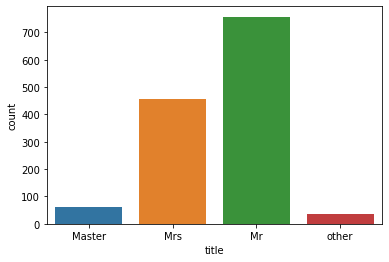

In [59]:
g = sns.countplot(df['title'])

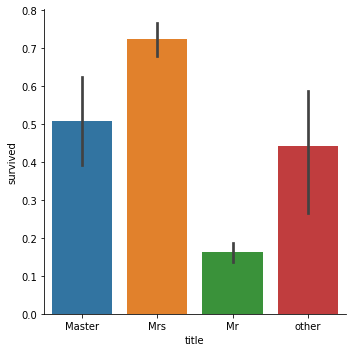

In [60]:
g = sns.factorplot(x='title',y='survived',data=df,kind="bar")

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1308
Data columns (total 12 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
sex          1309 non-null object
age          1309 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1309 non-null float64
embarked     1309 non-null object
home.dest    1309 non-null object
train        1309 non-null bool
title        1309 non-null object
dtypes: bool(1), float64(2), int64(4), object(5)
memory usage: 164.0+ KB


In [62]:
df['family_size'] = df['parch'] + df['sibsp'] + 1
df['family_single'] = df['family_size'] == 1
df['family_small'] = (df['family_size'] > 1) & (df['family_size'] <= 4)
df['family_large'] = df['family_size'] > 4

In [63]:
df.sample(20)

,pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked,home.dest,train,title,family_size,family_single,family_small,family_large
1147,3,0,female,22.0,0,0,3101295,3.681036,S,"New York, NY",True,Mrs,1,True,False,False
701,3,0,male,17.0,0,0,315086,2.159003,S,"New York, NY",True,Mr,1,True,False,False
223,1,0,male,28.0,0,0,112052,0.000000,S,Belfast,True,Mr,1,True,False,False
54,1,1,male,11.0,1,2,113760,4.787492,S,"Bryn Mawr, PA",True,Master,4,False,True,False
1092,3,0,male,20.0,0,0,315094,2.159003,S,"New York, NY",True,Mr,1,True,False,False
24,1,1,female,29.0,0,0,PC 17483,5.401682,S,"New York, NY",True,Mrs,1,True,False,False
210,1,0,male,55.0,0,0,113787,3.417727,S,"Montreal, PQ",False,Mr,1,True,False,False
571,2,0,male,23.0,0,0,233639,2.564949,S,"New York, NY",True,Mr,1,True,False,False
301,1,0,male,47.0,0,0,36967,3.526972,S,"East Orange, NJ",True,Mr,1,True,False,False
1078,3,1,female,28.0,0,0,330959,2.064226,Q,"New York, NY",True,Mrs,1,True,False,False


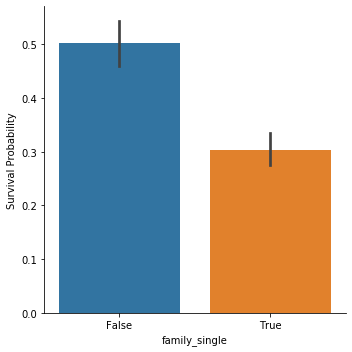

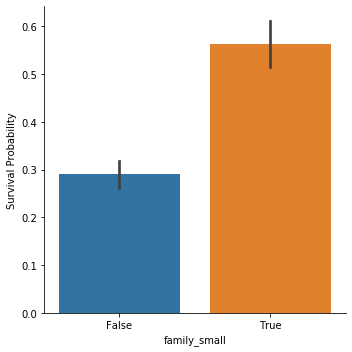

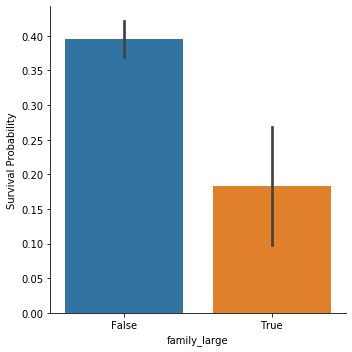

In [64]:
for fsize in ['single', 'small', 'large']:
    g = sns.factorplot(x=f'family_{fsize}',y='survived',data=df,kind="bar")
    g = g.set_ylabels("Survival Probability")

In [65]:
df.ticket.sample(30)

1093             7534
500             28403
784            347072
729            349230
235          PC 17607
866           3101298
619              2223
704        A./5. 2152
1031           364506
648              2692
1040           382653
1292    S.O./P.P. 751
1029           371110
566            237734
429            248746
113             19950
1272           345765
639            347077
761            345778
83             112901
1017           345501
588             29103
886             14313
5               19952
257             13236
54             113760
801            364851
630            350043
286          PC 17483
93              33638
Name: ticket, dtype: object

In [66]:
# Ticket prefix
def extract_ticket_prefix(i):
    if not i.isdigit() :
        rv = i.replace('.',"").replace('/',"").strip().split(' ')[0]
    else:
        rv = 'X'
    return rv

In [67]:
df['ticket'] = df['ticket'].apply(extract_ticket_prefix)

In [68]:
df.ticket.value_counts()

X          957
PC          92
CA          68
A5          28
SOTONOQ     24
WC          15
STONO       14
SCPARIS     14
A4          10
FCC          9
C            8
SOC          8
STONO2       7
SOPP         7
SCAH         5
SCParis      5
WEP          4
PP           4
LINE         4
FC           3
SOTONO2      3
SWPP         2
SCA4         2
SC           2
PPP          2
STONOQ       1
SP           1
CASOTON      1
SCOW         1
AS           1
AQ3          1
A            1
Fa           1
SCA3         1
LP           1
SOP          1
AQ4          1
Name: ticket, dtype: int64

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1308
Data columns (total 16 columns):
pclass           1309 non-null int64
survived         1309 non-null int64
sex              1309 non-null object
age              1309 non-null float64
sibsp            1309 non-null int64
parch            1309 non-null int64
ticket           1309 non-null object
fare             1309 non-null float64
embarked         1309 non-null object
home.dest        1309 non-null object
train            1309 non-null bool
title            1309 non-null object
family_size      1309 non-null int64
family_single    1309 non-null bool
family_small     1309 non-null bool
family_large     1309 non-null bool
dtypes: bool(4), float64(2), int64(5), object(5)
memory usage: 178.1+ KB


## Ejercicio 6: Fitteo de regresión logistica

In [70]:
df['home.dest'].value_counts().index.values[0: 10]

array(['New York, NY', 'London', 'Montreal, PQ', 'Cornwall / Akron, OH',
       'Paris, France', 'Wiltshire, England Niagara Falls, NY',
       'Philadelphia, PA', 'Winnipeg, MB', 'Sweden Winnipeg, MN',
       'Belfast'], dtype=object)

In [71]:
def _encode_categorical(df, top=20):
    logger.info("Filtering categorical columns top values...")
    cat_cols = _get_typed_cols(df, col_type='cat')
    logger.info(f"Categorical columns:\n {cat_cols}")

    for c in cat_cols:
        top_categories = df[c].value_counts().index.values[0:top]
        logger.info(f"Top categories for {c}:\n {top_categories}")
        df[c] = df[c].where(df[c].isin(top_categories), other='OTHER')

    logger.info("Getting dummies from top categories...")
    df = pd.get_dummies(df, columns=cat_cols, drop_first=False)
    logger.info(
        f"{len(df.columns)} columns after dummies:\n " f"{sorted(df.columns.tolist())}"
    )
    return df

In [72]:
df = _encode_categorical(df)

2019-12-08 22:09:19,596-__main__-INFO: Filtering categorical columns top values...
2019-12-08 22:09:19,615-__main__-INFO: Categorical columns:
 ['sex', 'ticket', 'embarked', 'home.dest', 'title']
2019-12-08 22:09:19,623-__main__-INFO: Top categories for sex:
 ['male' 'female']
2019-12-08 22:09:19,636-__main__-INFO: Top categories for ticket:
 ['X' 'PC' 'CA' 'A5' 'SOTONOQ' 'WC' 'STONO' 'SCPARIS' 'A4' 'FCC' 'C' 'SOC'
 'STONO2' 'SOPP' 'SCAH' 'SCParis' 'WEP' 'PP' 'LINE' 'FC']
2019-12-08 22:09:19,650-__main__-INFO: Top categories for embarked:
 ['S' 'C' 'Q']
2019-12-08 22:09:19,661-__main__-INFO: Top categories for home.dest:
 ['New York, NY' 'London' 'Montreal, PQ' 'Cornwall / Akron, OH'
 'Paris, France' 'Wiltshire, England Niagara Falls, NY' 'Philadelphia, PA'
 'Winnipeg, MB' 'Sweden Winnipeg, MN' 'Belfast' 'Brooklyn, NY'
 'Sweden Worcester, MA' 'Haverford, PA / Cooperstown, NY'
 'Bulgaria Chicago, IL' 'Rotherfield, Sussex, England Essex Co, MA'
 'Somerset / Bernardsville, NJ' 'Ottawa, ON

In [73]:
df.columns

Index(['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'train',
       'family_size', 'family_single', 'family_small', 'family_large',
       'sex_female', 'sex_male', 'ticket_A4', 'ticket_A5', 'ticket_C',
       'ticket_CA', 'ticket_FC', 'ticket_FCC', 'ticket_LINE', 'ticket_OTHER',
       'ticket_PC', 'ticket_PP', 'ticket_SCAH', 'ticket_SCPARIS',
       'ticket_SCParis', 'ticket_SOC', 'ticket_SOPP', 'ticket_SOTONOQ',
       'ticket_STONO', 'ticket_STONO2', 'ticket_WC', 'ticket_WEP', 'ticket_X',
       'embarked_C', 'embarked_Q', 'embarked_S', 'home.dest_Belfast',
       'home.dest_Brooklyn, NY', 'home.dest_Bulgaria Chicago, IL',
       'home.dest_Cornwall / Akron, OH', 'home.dest_Haverford, PA',
       'home.dest_Haverford, PA / Cooperstown, NY',
       'home.dest_Ireland Chicago, IL', 'home.dest_London',
       'home.dest_Montreal, PQ', 'home.dest_New York, NY', 'home.dest_OTHER',
       'home.dest_Ottawa, ON', 'home.dest_Paris, France',
       'home.dest_Philadelphia, PA',
  

In [74]:
df_train = df[df['train']]
df_test = df[~df['train']]
y_train = df_train['survived']
y_test = df_test['survived']
X_train = df_train.drop(['survived', 'train'], axis=1)
X_test = df_test.drop(['survived', 'train'], axis=1)

In [75]:
'age' in X_test.columns

True

In [76]:
from sklearn.linear_model import LogisticRegression

ModuleNotFoundError: No module named 'sklearn'

In [77]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred_proba = lr.predict_proba(X_test)[:, 1]

NameError: name 'LogisticRegression' is not defined

In [ ]:
y_pred

In [ ]:
y_pred_proba

In [ ]:
lr.score?

In [ ]:
lr.score(X_train, y_train)

In [ ]:
lr.score(X_test, y_test)

In [ ]:
import sklearn.metrics as metrics

In [ ]:
roc_score = metrics.roc_auc_score(y_test, y_pred_proba)
roc_score

In [ ]:
f1_score = metrics.f1_score(y_test, y_pred)
f1_score

In [ ]:
cr = metrics.classification_report(y_test, y_pred)
print(cr)

## Ejercicio 7: árboles

In [ ]:
from sklearn import tree

In [ ]:
dt = tree.DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
y_pred_proba = dt.predict_proba(X_test)[:, 1]

In [ ]:
tree.plot_tree(dt)

In [ ]:
dt.score(X_train, y_train)

In [ ]:
dt.score(X_test, y_test)

In [ ]:
# Random forest
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5, n_jobs=-1, verbose=2,)
rf = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:, 1]
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

In [ ]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
feat_import = list(
zip(np.asanyarray(X_train.columns)[indices], importances[indices])
)
feat_import = pd.DataFrame(feat_import, columns=['feature', 'importance'])

In [ ]:
feat_import

In [ ]:
ax = feat_import[:20].plot(kind='bar')
ax.set_xticklabels(feat_import[:20]['feature'].tolist())